In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=85ab38622ffefe84dff59730c06c7edd


In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
 # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | solnechnyy
Processing Record 2 of Set 1 | copiapo
Processing Record 3 of Set 1 | joshimath
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | komsomolskiy
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | monrovia
Processing Record 13 of Set 1 | rongcheng
Processing Record 14 of Set 1 | bakchar
Processing Record 15 of Set 1 | tessalit
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set

Processing Record 39 of Set 4 | ekuvukeni
Processing Record 40 of Set 4 | mirandela
Processing Record 41 of Set 4 | asfi
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | kailua
Processing Record 44 of Set 4 | phan rang
City not found. Skipping...
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | broome
Processing Record 48 of Set 4 | labytnangi
Processing Record 49 of Set 4 | sarajevo
Processing Record 50 of Set 4 | karatsu
Processing Record 1 of Set 5 | xichang
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | okha
Processing Record 7 of Set 5 | buckeye
Processing Record 8 of Set 5 | sambava
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Set 5 | polis
Processing Record 11 of Set 5 | yellowknife
P

Processing Record 26 of Set 8 | port hardy
Processing Record 27 of Set 8 | aksay
Processing Record 28 of Set 8 | cap-aux-meules
Processing Record 29 of Set 8 | terrace
Processing Record 30 of Set 8 | acapulco
Processing Record 31 of Set 8 | rudsar
Processing Record 32 of Set 8 | tombouctou
Processing Record 33 of Set 8 | kaitangata
Processing Record 34 of Set 8 | ust-nera
Processing Record 35 of Set 8 | huarmey
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | warmbad
Processing Record 39 of Set 8 | bijar
Processing Record 40 of Set 8 | mehamn
Processing Record 41 of Set 8 | macieira de cambra
Processing Record 42 of Set 8 | stoyba
City not found. Skipping...
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | mwinilunga
Processing Record 46 of Set 8 | tubruq
City not found. Skipping...
Processing Record 47 of Set 8 | xining
Processing Record 48 of

Processing Record 11 of Set 12 | uzunovo
Processing Record 12 of Set 12 | avera
Processing Record 13 of Set 12 | kambove
Processing Record 14 of Set 12 | rancho grande
Processing Record 15 of Set 12 | meulaboh
Processing Record 16 of Set 12 | caramay
Processing Record 17 of Set 12 | lac du bonnet
Processing Record 18 of Set 12 | embu
Processing Record 19 of Set 12 | gulshat
City not found. Skipping...
Processing Record 20 of Set 12 | vila
Processing Record 21 of Set 12 | mandurah
Processing Record 22 of Set 12 | abu zabad
Processing Record 23 of Set 12 | langxiang
Processing Record 24 of Set 12 | launceston
Processing Record 25 of Set 12 | wladyslawowo
Processing Record 26 of Set 12 | dudinka
Processing Record 27 of Set 12 | albolote
Processing Record 28 of Set 12 | basco
Processing Record 29 of Set 12 | bowen
Processing Record 30 of Set 12 | artyom
Processing Record 31 of Set 12 | meyungs
City not found. Skipping...
Processing Record 32 of Set 12 | champerico
Processing Record 33 of S

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solnechnyy,50.7214,136.6319,79.45,42,40,7.02,RU,2021-08-15 06:12:27
1,Copiapo,-27.3667,-70.3333,49.69,72,95,2.26,CL,2021-08-15 06:12:27
2,Joshimath,30.5667,79.5667,80.04,49,1,8.23,IN,2021-08-15 06:12:27
3,Cape Town,-33.9258,18.4232,52.12,59,5,3.31,ZA,2021-08-15 06:09:10
4,Komsomolskiy,40.4272,71.7189,81.32,26,65,9.22,UZ,2021-08-15 06:12:28
5,Bambous Virieux,-20.3428,57.7575,73.22,60,75,13.80,MU,2021-08-15 06:12:28
6,Dikson,73.5069,80.5464,50.25,95,100,19.46,RU,2021-08-15 06:12:29
7,Bethel,41.3712,-73.4140,73.76,69,75,0.00,US,2021-08-15 06:12:29
8,Aklavik,68.2191,-135.0107,50.22,58,43,7.70,CA,2021-08-15 06:12:29
9,Monrovia,6.3005,-10.7969,76.42,74,99,8.37,LR,2021-08-15 06:12:30


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Solnechnyy,RU,2021-08-15 06:12:27,50.7214,136.6319,79.45,42,40,7.02
1,Copiapo,CL,2021-08-15 06:12:27,-27.3667,-70.3333,49.69,72,95,2.26
2,Joshimath,IN,2021-08-15 06:12:27,30.5667,79.5667,80.04,49,1,8.23
3,Cape Town,ZA,2021-08-15 06:09:10,-33.9258,18.4232,52.12,59,5,3.31
4,Komsomolskiy,UZ,2021-08-15 06:12:28,40.4272,71.7189,81.32,26,65,9.22
5,Bambous Virieux,MU,2021-08-15 06:12:28,-20.3428,57.7575,73.22,60,75,13.80
6,Dikson,RU,2021-08-15 06:12:29,73.5069,80.5464,50.25,95,100,19.46
7,Bethel,US,2021-08-15 06:12:29,41.3712,-73.4140,73.76,69,75,0.00
8,Aklavik,CA,2021-08-15 06:12:29,68.2191,-135.0107,50.22,58,43,7.70
9,Monrovia,LR,2021-08-15 06:12:30,6.3005,-10.7969,76.42,74,99,8.37


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/15/21'

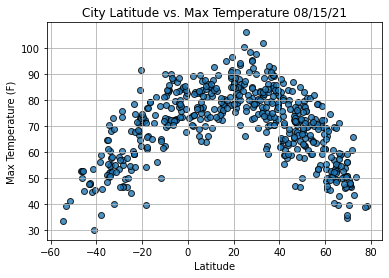

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


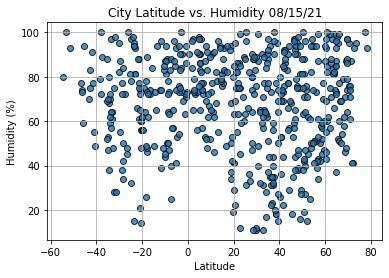

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


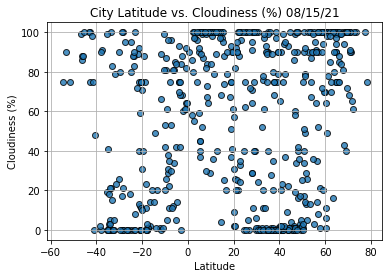

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


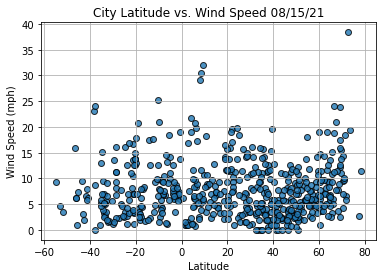

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Cidreira
Country                        BR
Date          2021-08-15 06:12:31
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    58.14
Humidity                       95
Cloudiness                     26
Wind Speed                   5.59
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >=0

0       True
1      False
2       True
3      False
4       True
       ...  
542    False
543     True
544     True
545     True
546    False
Name: Lat, Length: 547, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Solnechnyy,RU,2021-08-15 06:12:27,50.7214,136.6319,79.45,42,40,7.02
2,Joshimath,IN,2021-08-15 06:12:27,30.5667,79.5667,80.04,49,1,8.23
4,Komsomolskiy,UZ,2021-08-15 06:12:28,40.4272,71.7189,81.32,26,65,9.22
6,Dikson,RU,2021-08-15 06:12:29,73.5069,80.5464,50.25,95,100,19.46
7,Bethel,US,2021-08-15 06:12:29,41.3712,-73.4140,73.76,69,75,0.00


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

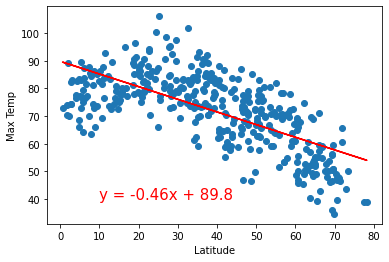

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Max Temp', text_coordinates=(10,40))

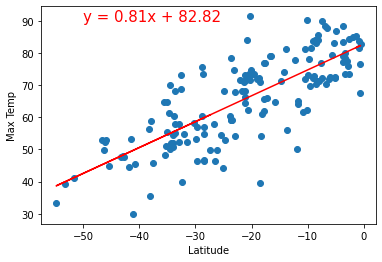

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

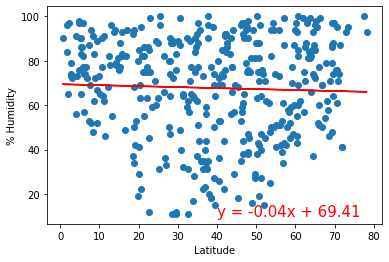

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

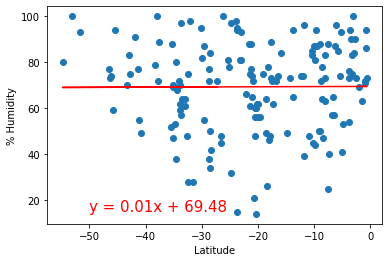

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

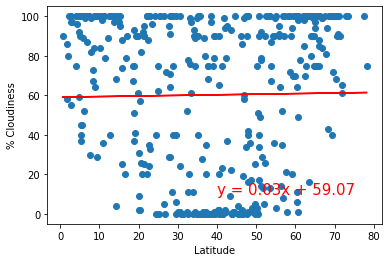

In [30]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

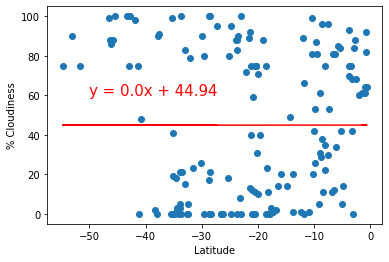

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

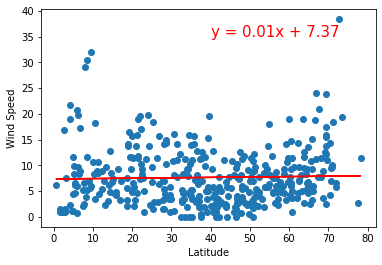

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

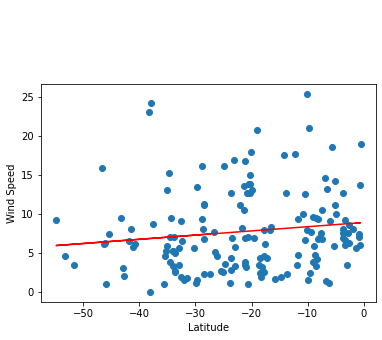

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))